In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from CentralizedModel import Params as Pnew
import networkx as nx
import time
from CentralizedModel_juanest import CentralizedSinglePeriod

In [2]:
filename = 'TASE_Setup.xlsx'
TASE=True
#filename = 'CASE23_baseline.xlsx'
#TASE=False
param = Pnew(filename=filename,scid=0)
param.create_instance(sample=False)
param.to_json()
params = json.load(open('data_1new.json'))

ratios = [[0,0],[100,0]] #
#ratios = [[0,0],[0.05,5000]]
models = []

for ratio in ratios:
    file_segments = filename.split('/')
    xlsx_name = file_segments[-1][:-5].split('_')[-1]
    print(f'Scenario_{xlsx_name}_ratio_{ratio[0]}_{ratio[1]}')
    model = CentralizedSinglePeriod(params=params,ratios=ratio,relax=False,TASE=TASE)
    SC = pd.read_excel('TASE_Setup.xlsx',sheet_name='Link')[['Source','Destination']]
    V = list(set(list(SC.Source.unique())+list(SC.Destination.unique())))
    model.SC = SC
    model.V = V
    print('GurobipyResults')
    start_time = time.time()
    model.solve(silent=True)
    end_time = time.time()
    print(end_time-start_time)
    print('------')
    model.write_initialPlan('juanest_InitalPlans.json')
    #model.solution_visualization()
    # beta = model.beta_sol
    # flow_arcs = []
    # V = []
    # for (i,j,k),val in beta.items():
    #     if val == 1:
    #         flow_arcs.append((i,j))
    #         V.append(i)
    #         V.append(j)
    # V = list(set(V))
    # G = nx.DiGraph(rankdir='LR',seed=2)
    # G.add_nodes_from(V)
    # G.add_edges_from(flow_arcs)
    # plt.figure(figsize=(10,10) )
    # pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
    # nx.draw(G, pos,node_size=100,width=1,with_labels=True,
    #                             node_color='gray',
    #                             font_size=10,
    #                             font_color='k',
    #                             edge_color='white',
    #                             arrows=False)
    #     #Adding first flows
    # nx.draw_networkx_edges(
    #         G,
    #         pos,
    #         edgelist=flow_arcs,
    #         alpha=1,
    #         #width=flow_arcs_number_1,
    #         #edge_color=flow_arcs_color_1,
    #         connectionstyle='arc3',
    #         #style=flow_arcs_style_1
    #         #'arc3,rad=0.2'
    #         )
    # #plt.savefig(f'TASE_SCLayout.pdf',bbox_inches='tight')
    # plt.show()
    models.append(model)
    

Scenario_Setup_ratio_0_0
Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-14
GurobipyResults
5.396672010421753
------
Scenario_Setup_ratio_100_0
GurobipyResults
6.241722106933594
------


In [6]:
simulations = []
for r_idx in range(len(ratios)):
    ratio = ratios[r_idx]
    model = models[r_idx]
    disrupted_agents = {'All':['log_norm',0.3]}
    model.TASE_adapt()
    df_sim_res,scenarios = model.generate_stochastic_leadtime(n_samples=100,disrupted_agents=disrupted_agents)
    df_sim_res['scenario'] = f'{ratio[0]}:{ratio[1]}'
    simulations.append(df_sim_res)

/Users/juanest/Documents/PhD/Summer23/StochasticOptimization/Legacy/CentralizedModel_juanest.py:875: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  k_data = k_data.append(dummyrow)


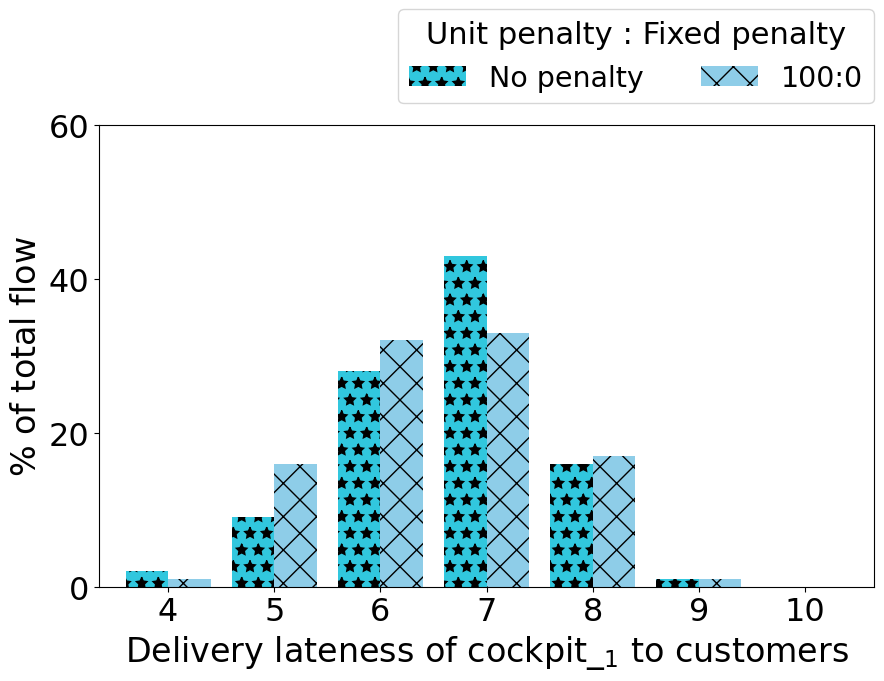

/Users/juanest/Documents/PhD/Summer23/StochasticOptimization/Legacy/CentralizedModel_juanest.py:875: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  k_data = k_data.append(dummyrow)


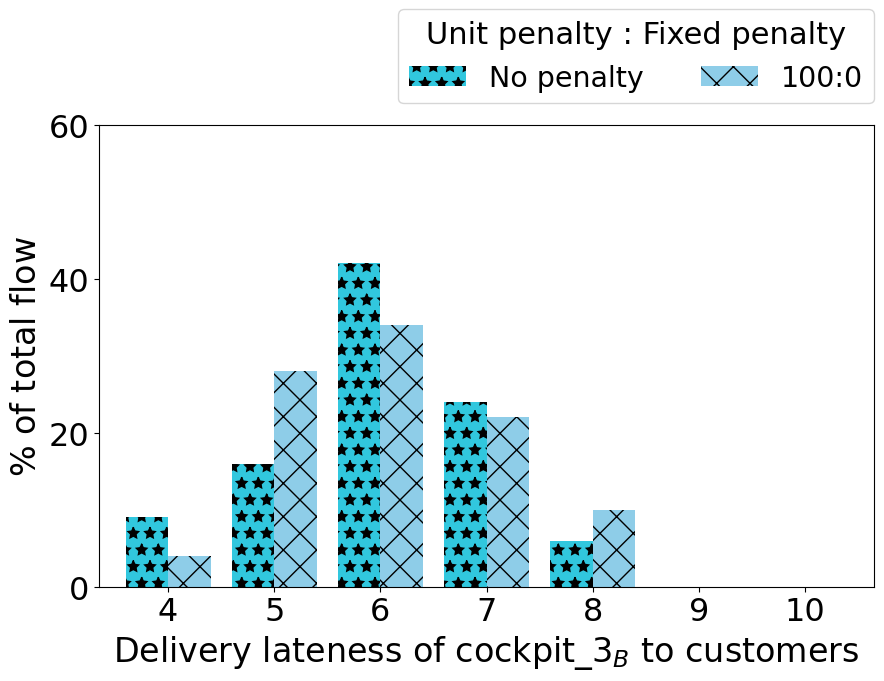

/Users/juanest/Documents/PhD/Summer23/StochasticOptimization/Legacy/CentralizedModel_juanest.py:875: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  k_data = k_data.append(dummyrow)


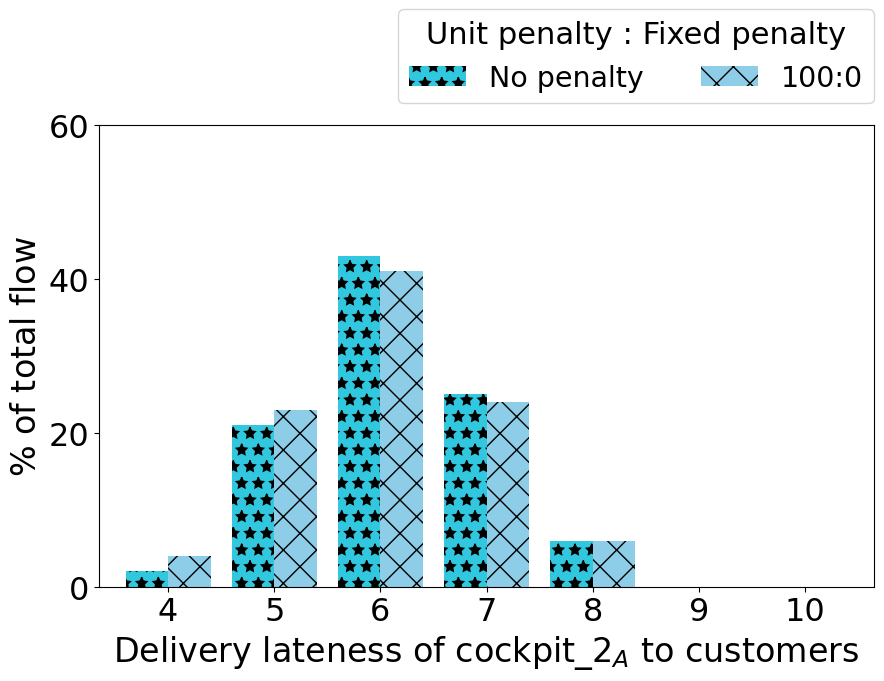

/Users/juanest/Documents/PhD/Summer23/StochasticOptimization/Legacy/CentralizedModel_juanest.py:875: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  k_data = k_data.append(dummyrow)
/Users/juanest/Documents/PhD/Summer23/StochasticOptimization/Legacy/CentralizedModel_juanest.py:875: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  k_data = k_data.append(dummyrow)


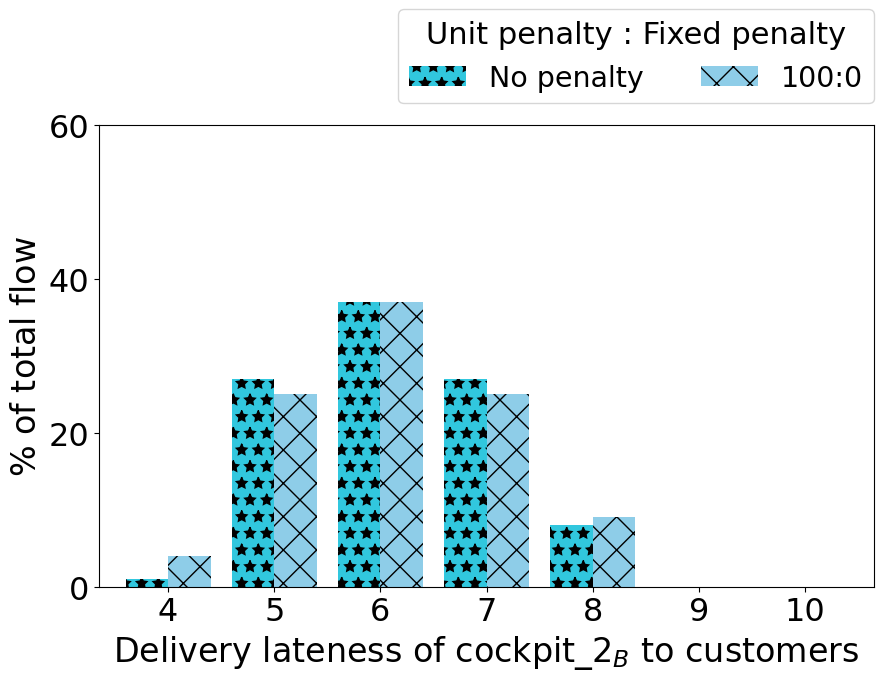

/Users/juanest/Documents/PhD/Summer23/StochasticOptimization/Legacy/CentralizedModel_juanest.py:875: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  k_data = k_data.append(dummyrow)


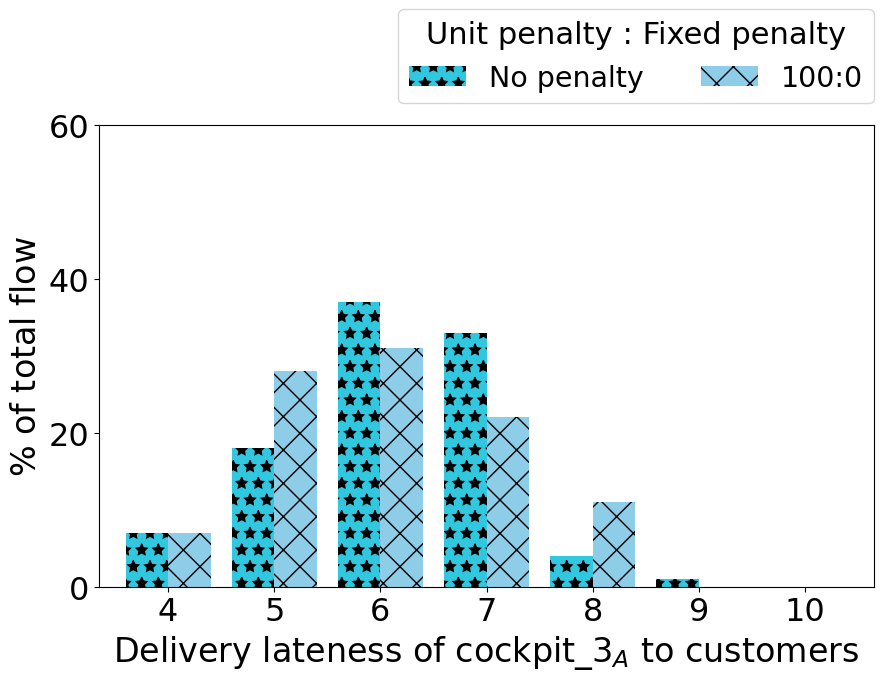

/Users/juanest/Documents/PhD/Summer23/StochasticOptimization/Legacy/CentralizedModel_juanest.py:875: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  k_data = k_data.append(dummyrow)


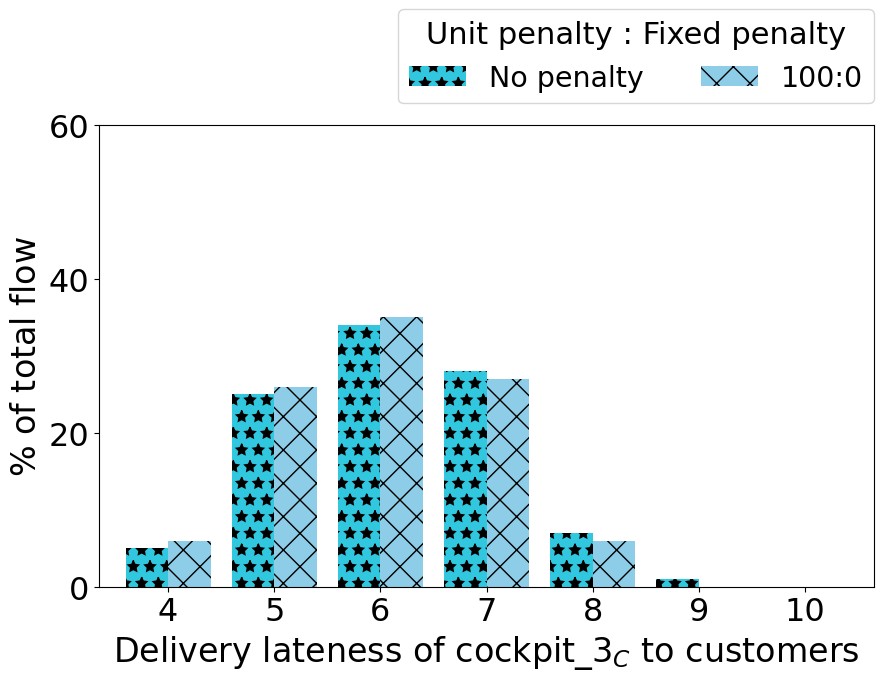

In [7]:
k_data = model.condensed_statistics_compare(simulations,['#31C7DE','#8ECDE8','#42A1FF','#140694'],'Veh2_S7_simulation',x_low=4,x_high=11) #,